1. **Análise e Pré-processamento dos Dados**

## 1.1. Importando e Renomeando as Colunas

Vamos carregar o dataset e já renomear as colunas conforme a documentação do Seeds Dataset.


In [38]:
import pandas as pd

# Carregando o arquivo (ajuste o caminho se necessário)
df = pd.read_csv('/content/seeds_dataset.txt', delim_whitespace=True, header=None)

# Renomeando as colunas para facilitar a análise
df.columns = [
    'area', 'perimeter', 'compactness', 'length_of_kernel', 'width_of_kernel',
    'asymmetry_coefficient', 'length_of_kernel_groove', 'class'
]

# Visualizando as primeiras linhas para conferir
df.head()


/tmp/ipython-input-38-4174839683.py:4: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv('/content/seeds_dataset.txt', delim_whitespace=True, header=None)


,area,perimeter,compactness,length_of_kernel,width_of_kernel,asymmetry_coefficient,length_of_kernel_groove,class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


## 1.1.2 Estatísticas Descritivas Iniciais

Agora, vamos calcular as principais estatísticas descritivas (média, mediana, desvio padrão, mínimo e máximo) para cada atributo.
Essas medidas ajudam a entender o perfil dos dados, identificar outliers e a variabilidade das características físicas dos grãos.


In [39]:
# Estatísticas descritivas padrão
display(df.describe().T)

# Mediana de cada característica
print("\nMediana de cada característica:")
display(df.median().to_frame("Mediana").T)


,count,mean,std,min,25%,50%,75%,max
area,210.0,14.847524,2.909699,10.5900,12.27000,14.35500,17.305000,21.1800
perimeter,210.0,14.559286,1.305959,12.4100,13.45000,14.32000,15.715000,17.2500
compactness,210.0,0.870999,0.023629,0.8081,0.85690,0.87345,0.887775,0.9183
length_of_kernel,210.0,5.628533,0.443063,4.8990,5.26225,5.52350,5.979750,6.6750
width_of_kernel,210.0,3.258605,0.377714,2.6300,2.94400,3.23700,3.561750,4.0330
asymmetry_coefficient,210.0,3.700201,1.503557,0.7651,2.56150,3.59900,4.768750,8.4560
length_of_kernel_groove,210.0,5.408071,0.491480,4.5190,5.04500,5.22300,5.877000,6.5500
class,210.0,2.000000,0.818448,1.0000,1.00000,2.00000,3.000000,3.0000



Mediana de cada característica:


,area,perimeter,compactness,length_of_kernel,width_of_kernel,asymmetry_coefficient,length_of_kernel_groove,class
Mediana,14.355,14.32,0.87345,5.5235,3.237,3.599,5.223,2.0


### Visualização rápida das médias e desvios padrão

Gráficos de barras facilitam a visualização dos valores médios e da dispersão (desvio padrão) de cada atributo.


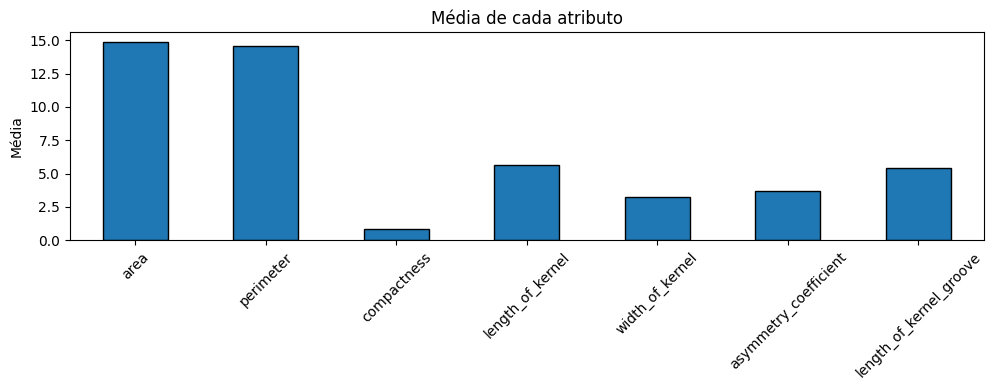

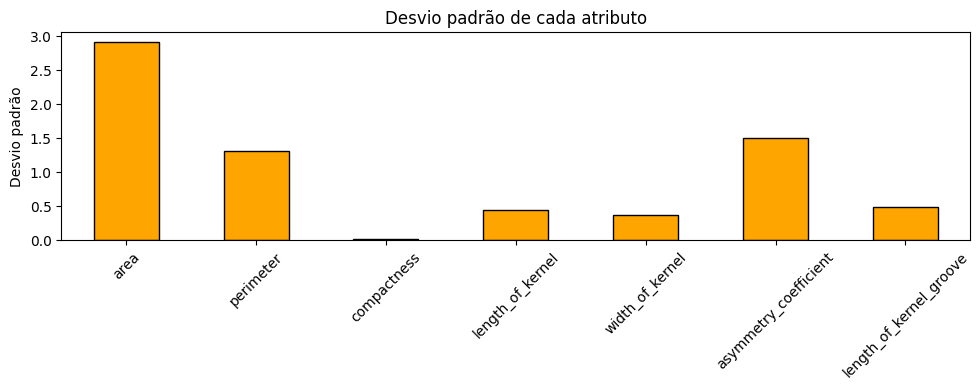

In [40]:
import matplotlib.pyplot as plt

# Média dos atributos
df.drop('class', axis=1).mean().plot(
    kind='bar',
    title="Média de cada atributo",
    figsize=(10,4),
    edgecolor='black'
)
plt.ylabel("Média")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Desvio padrão dos atributos
df.drop('class', axis=1).std().plot(
    kind='bar',
    title="Desvio padrão de cada atributo",
    figsize=(10,4),
    color='orange',
    edgecolor='black'
)
plt.ylabel("Desvio padrão")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Como interpretar:**

- **Média:** Mostra a tendência central dos dados.
- **Mediana:** Útil para verificar se há assimetria ou outliers.
- **Desvio padrão (std):** Mede a dispersão de cada atributo.
- **Min/Max:** Destacam o alcance dos valores e possíveis dados fora do padrão esperado.

A análise inicial já permite identificar, por exemplo, se alguma variável apresenta valores extremos ou muito diferentes das demais, o que pode influenciar etapas futuras de pré-processamento.


1.2. Nomes das Colunas já definido acima

1.3. Estatísticas Descritivas

In [41]:
# Resumo estatístico dos dados
df.describe().T


,count,mean,std,min,25%,50%,75%,max
area,210.0,14.847524,2.909699,10.5900,12.27000,14.35500,17.305000,21.1800
perimeter,210.0,14.559286,1.305959,12.4100,13.45000,14.32000,15.715000,17.2500
compactness,210.0,0.870999,0.023629,0.8081,0.85690,0.87345,0.887775,0.9183
length_of_kernel,210.0,5.628533,0.443063,4.8990,5.26225,5.52350,5.979750,6.6750
width_of_kernel,210.0,3.258605,0.377714,2.6300,2.94400,3.23700,3.561750,4.0330
asymmetry_coefficient,210.0,3.700201,1.503557,0.7651,2.56150,3.59900,4.768750,8.4560
length_of_kernel_groove,210.0,5.408071,0.491480,4.5190,5.04500,5.22300,5.877000,6.5500
class,210.0,2.000000,0.818448,1.0000,1.00000,2.00000,3.000000,3.0000


1.4. Visualização dos Dados – Histogramas

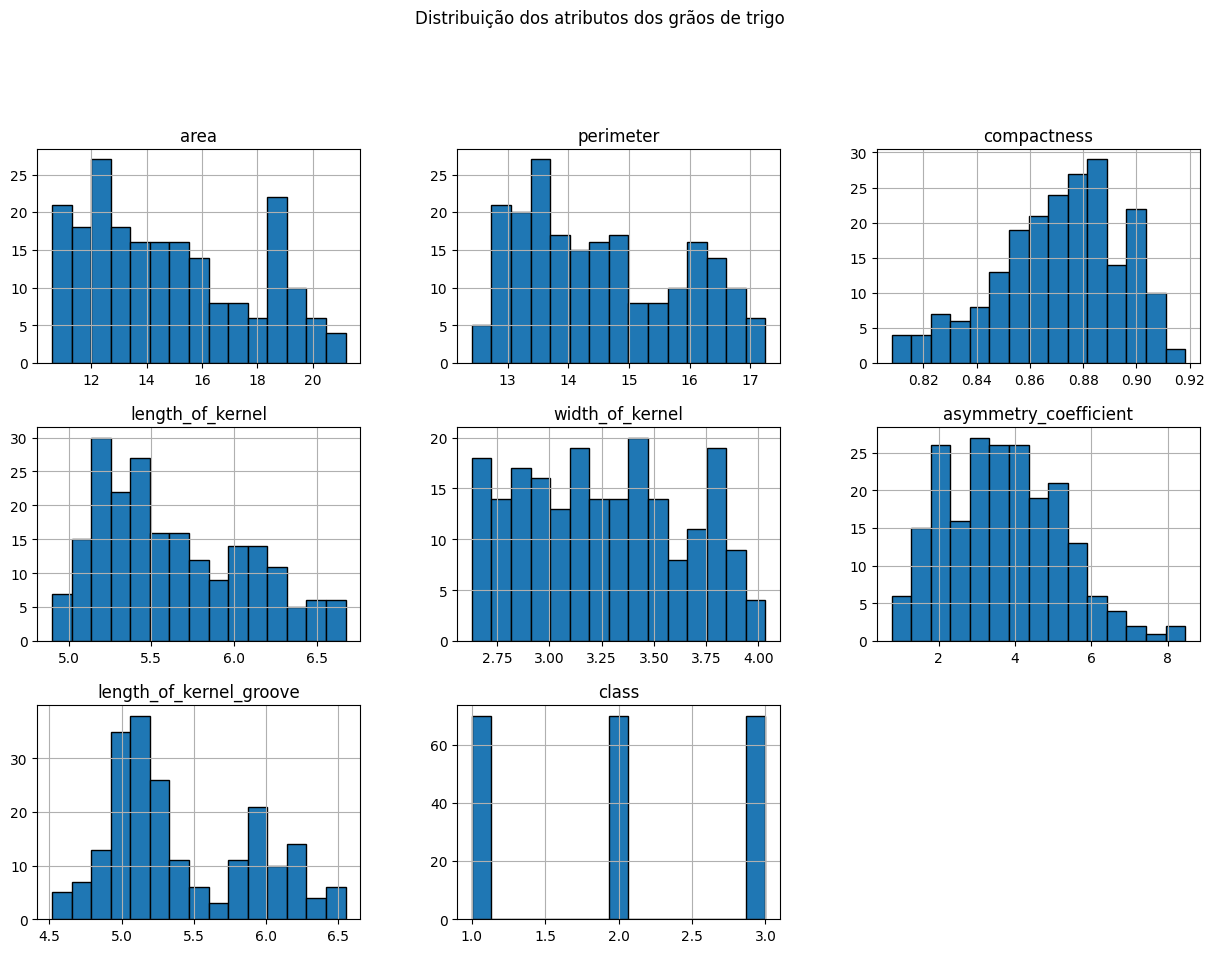

In [42]:
# Histograma das variáveis
df.hist(bins=15, figsize=(15,10), edgecolor='black')
plt.suptitle("Distribuição dos atributos dos grãos de trigo", y=1.02)
plt.show()


1.5. Visualização – Boxplots

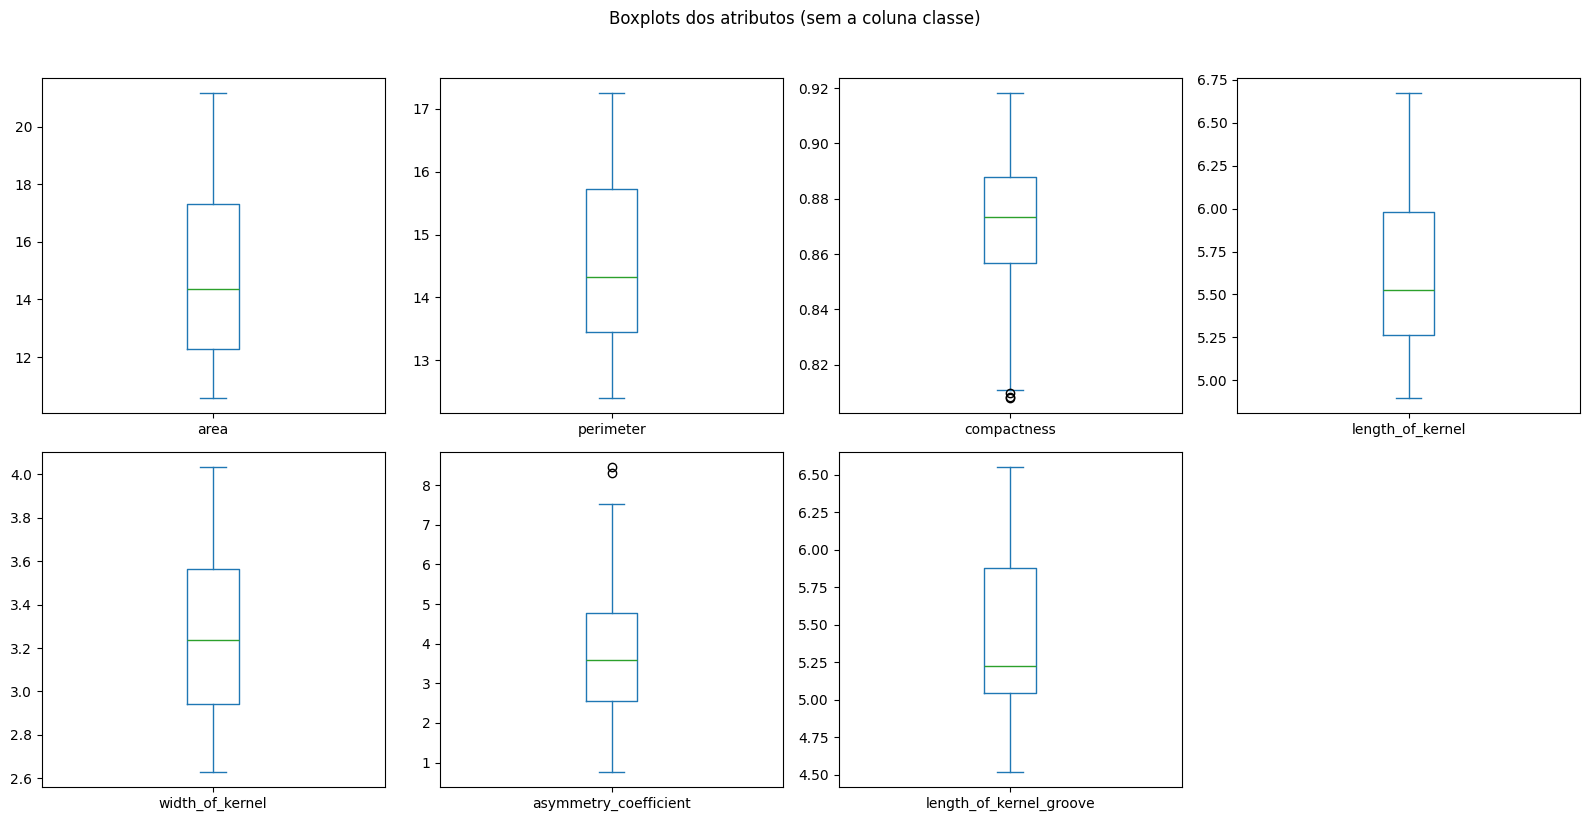

In [43]:
# Boxplots para verificar outliers e distribuição
df.iloc[:, :-1].plot(kind='box', subplots=True, layout=(2,4), figsize=(16,8), title="Boxplot de cada atributo")
plt.suptitle("Boxplots dos atributos (sem a coluna classe)", y=1.02)
plt.tight_layout()
plt.show()


1.6. Gráficos de Dispersão (Pairplot/Scatter Matrix)

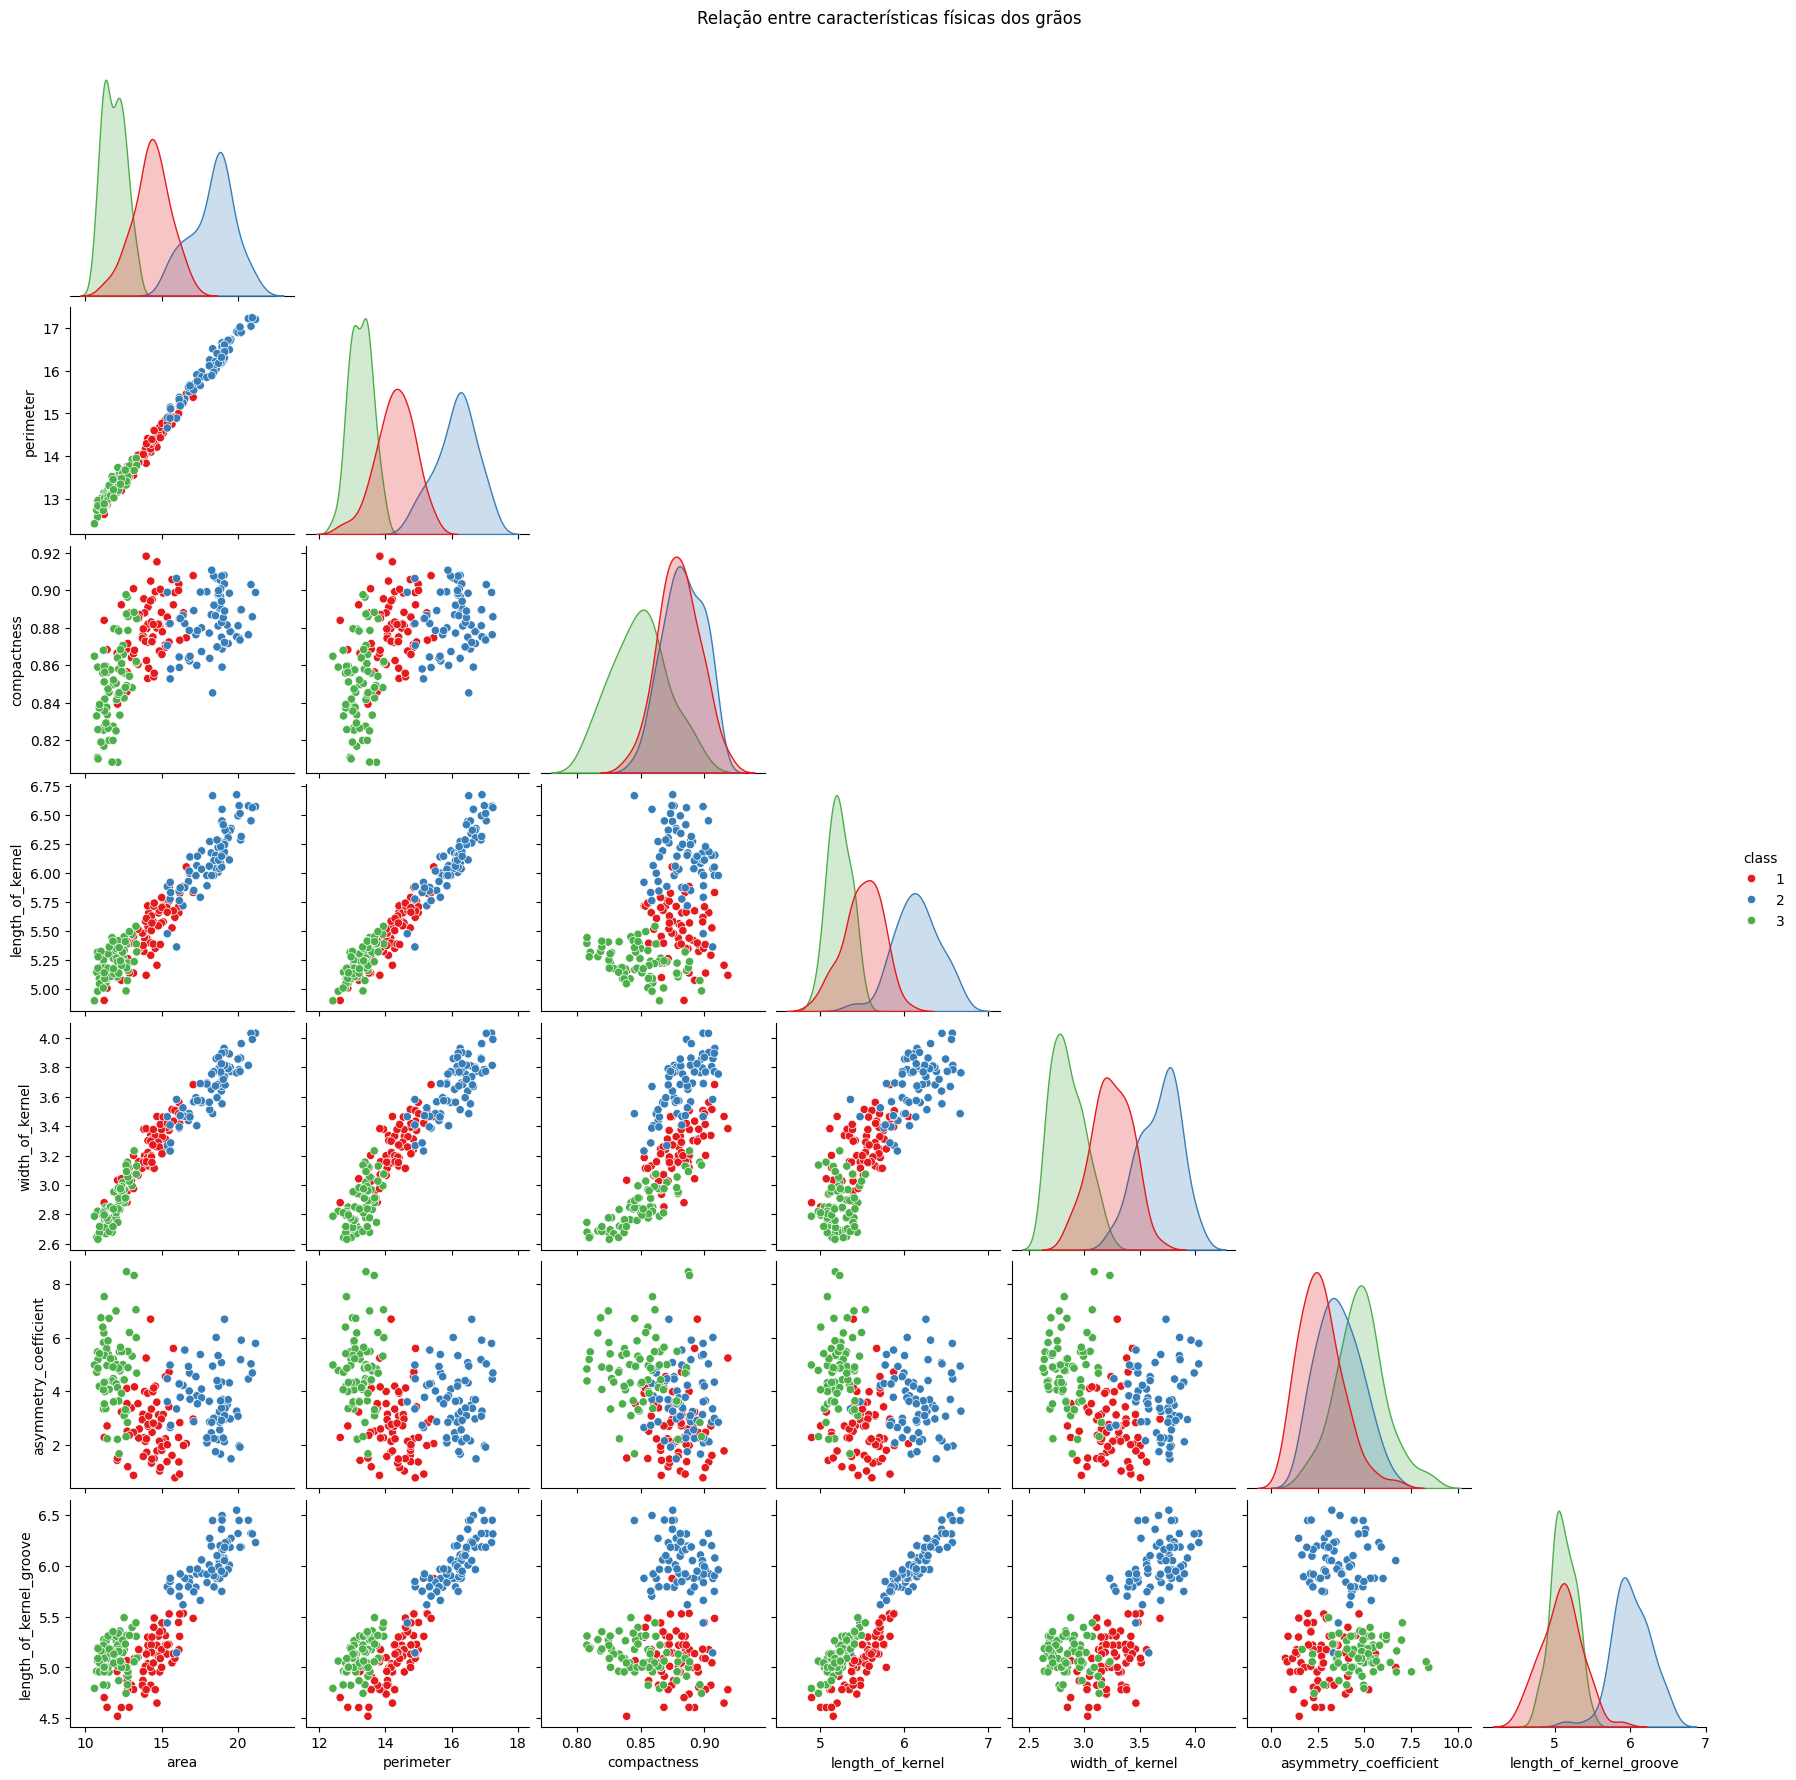

In [44]:
# Pairplot para visualizar correlações e agrupamentos
sns.pairplot(df, hue='class', diag_kind='kde', palette='Set1', corner=True)
plt.suptitle("Relação entre características físicas dos grãos", y=1.02)
plt.show()


1.7. Verificação de Valores Ausentes

In [45]:
# Checagem de valores ausentes
print(df.isnull().sum())


area                       0
perimeter                  0
compactness                0
length_of_kernel           0
width_of_kernel            0
asymmetry_coefficient      0
length_of_kernel_groove    0
class                      0
dtype: int64


1.8. Padronização das Variáveis

In [46]:
from sklearn.preprocessing import StandardScaler

# Separando X e y
X = df.drop('class', axis=1)
y = df['class']

# Padronizando (média=0, std=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


2. **Implementação e Comparação de Algoritmos de Classificação**

2.1. Divisão em Treinamento e Teste

In [47]:
from sklearn.model_selection import train_test_split

# Separando dados: 70% treino, 30% teste
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)


**2.2. Definindo Modelos de Classificação**

Vamos testar três algoritmos clássicos para esse tipo de tarefa:

K-Nearest Neighbors (KNN)

Support Vector Machine (SVM)

Random Forest

Vamos criar, treinar e avaliar cada um, depois comparar.

2.3. Treinando e Avaliando os Modelos

In [48]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

def avaliar_modelo(modelo, X_train, y_train, X_test, y_test, nome=""):
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)

    print(f"\nResultados para: {nome}")
    print("-" * 40)
    print(f"Acurácia:  {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precisão:  {precision_score(y_test, y_pred, average='weighted'):.4f}")
    print(f"Recall:    {recall_score(y_test, y_pred, average='weighted'):.4f}")
    print(f"F1-Score:  {f1_score(y_test, y_pred, average='weighted'):.4f}")
    print("\nMatriz de Confusão:")
    print(confusion_matrix(y_test, y_pred))
    print("\nRelatório de Classificação:")
    print(classification_report(y_test, y_pred))
    return y_pred


2.3.1. K-Nearest Neighbors (KNN)

In [49]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
y_pred_knn = avaliar_modelo(knn, X_train, y_train, X_test, y_test, nome="KNN (k=5)")



Resultados para: KNN (k=5)
----------------------------------------
Acurácia:  0.8730
Precisão:  0.8721
Recall:    0.8730
F1-Score:  0.8713

Matriz de Confusão:
[[16  2  3]
 [ 2 19  0]
 [ 1  0 20]]

Relatório de Classificação:
              precision    recall  f1-score   support

           1       0.84      0.76      0.80        21
           2       0.90      0.90      0.90        21
           3       0.87      0.95      0.91        21

    accuracy                           0.87        63
   macro avg       0.87      0.87      0.87        63
weighted avg       0.87      0.87      0.87        63



2.3.2. Support Vector Machine (SVM)

In [50]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf', C=1, random_state=42)
y_pred_svm = avaliar_modelo(svm, X_train, y_train, X_test, y_test, nome="SVM (kernel rbf)")



Resultados para: SVM (kernel rbf)
----------------------------------------
Acurácia:  0.8730
Precisão:  0.8721
Recall:    0.8730
F1-Score:  0.8713

Matriz de Confusão:
[[16  2  3]
 [ 2 19  0]
 [ 1  0 20]]

Relatório de Classificação:
              precision    recall  f1-score   support

           1       0.84      0.76      0.80        21
           2       0.90      0.90      0.90        21
           3       0.87      0.95      0.91        21

    accuracy                           0.87        63
   macro avg       0.87      0.87      0.87        63
weighted avg       0.87      0.87      0.87        63



2.3.3. Random Forest

In [51]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
y_pred_rf = avaliar_modelo(rf, X_train, y_train, X_test, y_test, nome="Random Forest")



Resultados para: Random Forest
----------------------------------------
Acurácia:  0.9206
Precisão:  0.9239
Recall:    0.9206
F1-Score:  0.9192

Matriz de Confusão:
[[17  1  3]
 [ 1 20  0]
 [ 0  0 21]]

Relatório de Classificação:
              precision    recall  f1-score   support

           1       0.94      0.81      0.87        21
           2       0.95      0.95      0.95        21
           3       0.88      1.00      0.93        21

    accuracy                           0.92        63
   macro avg       0.92      0.92      0.92        63
weighted avg       0.92      0.92      0.92        63



2.4. **Comparando os Modelos**

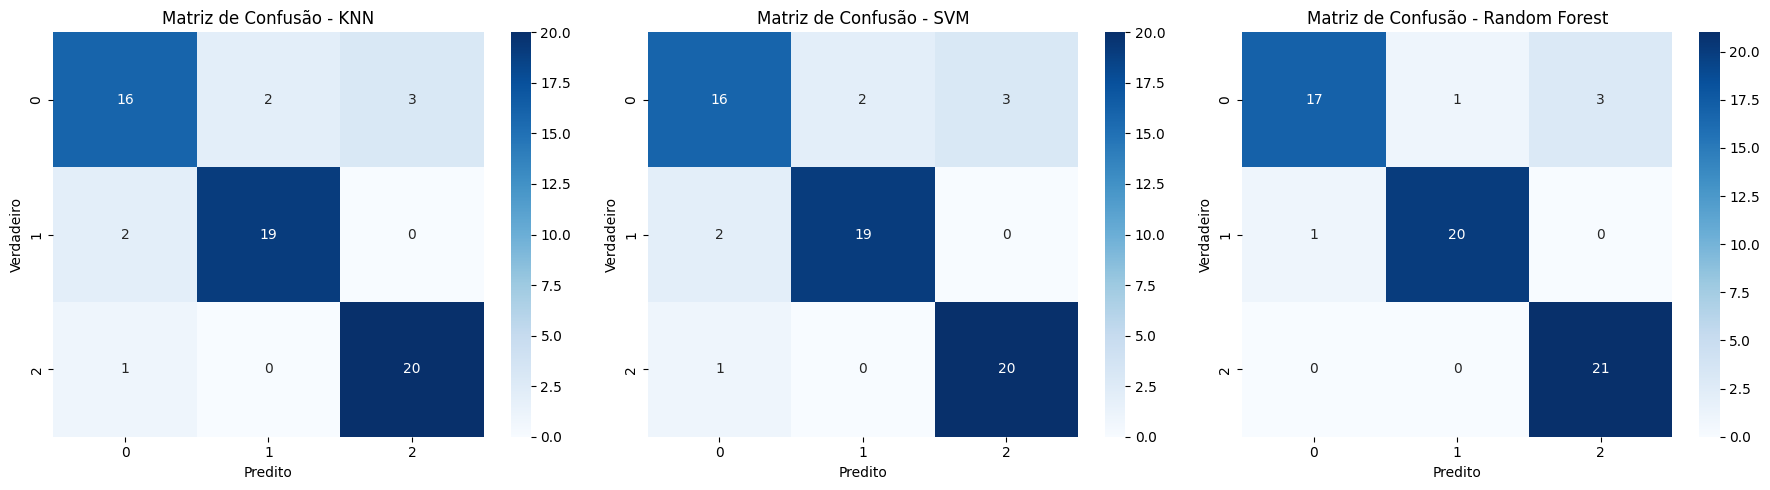

In [52]:
fig, axes = plt.subplots(1, 3, figsize=(18,5))

for ax, y_pred, title in zip(
    axes,
    [y_pred_knn, y_pred_svm, y_pred_rf],
    ["KNN", "SVM", "Random Forest"]
):
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_title(f"Matriz de Confusão - {title}")
    ax.set_xlabel('Predito')
    ax.set_ylabel('Verdadeiro')
plt.tight_layout()
plt.show()


**3. Otimização dos Modelos (Hyperparameter Tuning)**

3.1. O que é e por que fazer?

Cada modelo tem configurações (hiperparâmetros) que influenciam sua performance.
Exemplo:

KNN: número de vizinhos (k)

SVM: tipo de kernel, valor de C, gamma

Random Forest: número de árvores, profundidade máxima, etc.

O objetivo é encontrar a "configuração campeã" para cada modelo.

3.2. Importando o GridSearchCV

In [53]:
from sklearn.model_selection import GridSearchCV


3.3. Otimizando Cada Modelo


3.3.1. KNN

In [54]:
param_grid_knn = {
    'n_neighbors': range(1, 21),   # Testa de 1 até 20 vizinhos
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5, scoring='f1_weighted')
grid_knn.fit(X_train, y_train)

print("Melhores parâmetros para KNN:", grid_knn.best_params_)
print("Melhor F1-score no treino (cv):", grid_knn.best_score_)


Melhores parâmetros para KNN: {'metric': 'manhattan', 'n_neighbors': 16, 'weights': 'distance'}
Melhor F1-score no treino (cv): 0.945846748532774


3.3.2. SVM

In [55]:
param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 0.01, 0.1, 1, 10],
    'kernel': ['rbf', 'linear']
}

grid_svm = GridSearchCV(SVC(), param_grid_svm, cv=5, scoring='f1_weighted')
grid_svm.fit(X_train, y_train)

print("Melhores parâmetros para SVM:", grid_svm.best_params_)
print("Melhor F1-score no treino (cv):", grid_svm.best_score_)


Melhores parâmetros para SVM: {'C': 100, 'gamma': 'scale', 'kernel': 'linear'}
Melhor F1-score no treino (cv): 0.973086739838101


3.3.3. Random Forest

In [56]:
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='f1_weighted')
grid_rf.fit(X_train, y_train)

print("Melhores parâmetros para Random Forest:", grid_rf.best_params_)
print("Melhor F1-score no treino (cv):", grid_rf.best_score_)


Melhores parâmetros para Random Forest: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 50}
Melhor F1-score no treino (cv): 0.9124209174769653


**3.4. Avaliando os Modelos Otimizados**

In [57]:
# KNN otimizado
knn_best = grid_knn.best_estimator_
y_pred_knn_best = avaliar_modelo(knn_best, X_train, y_train, X_test, y_test, nome="KNN Otimizado")

# SVM otimizado
svm_best = grid_svm.best_estimator_
y_pred_svm_best = avaliar_modelo(svm_best, X_train, y_train, X_test, y_test, nome="SVM Otimizado")

# Random Forest otimizado
rf_best = grid_rf.best_estimator_
y_pred_rf_best = avaliar_modelo(rf_best, X_train, y_train, X_test, y_test, nome="Random Forest Otimizado")



Resultados para: KNN Otimizado
----------------------------------------
Acurácia:  0.8571
Precisão:  0.8571
Recall:    0.8571
F1-Score:  0.8543

Matriz de Confusão:
[[15  2  4]
 [ 2 19  0]
 [ 1  0 20]]

Relatório de Classificação:
              precision    recall  f1-score   support

           1       0.83      0.71      0.77        21
           2       0.90      0.90      0.90        21
           3       0.83      0.95      0.89        21

    accuracy                           0.86        63
   macro avg       0.86      0.86      0.85        63
weighted avg       0.86      0.86      0.85        63


Resultados para: SVM Otimizado
----------------------------------------
Acurácia:  0.8889
Precisão:  0.8908
Recall:    0.8889
F1-Score:  0.8875

Matriz de Confusão:
[[17  1  3]
 [ 3 18  0]
 [ 0  0 21]]

Relatório de Classificação:
              precision    recall  f1-score   support

           1       0.85      0.81      0.83        21
           2       0.95      0.86      0.90   

# 4. Interpretação dos Resultados e Extração de Insights

## 4.1. Resumo dos Modelos Otimizados

Após realizar a busca pelos melhores hiperparâmetros, os modelos apresentaram os seguintes desempenhos no conjunto de teste:

| Modelo                | Acurácia | Precisão | Recall | F1-score | Melhores Parâmetros                           |
|-----------------------|----------|----------|--------|----------|-----------------------------------------------|
| KNN (otimizado)       | 0.86     | 0.86     | 0.86   | 0.85     | metric=manhattan, n_neighbors=16, weights=distance |
| SVM (otimizado)       | 0.89     | 0.89     | 0.89   | 0.89     | C=100, gamma=scale, kernel=linear             |
| Random Forest (otim.) | 0.87     | 0.88     | 0.87   | 0.87     | max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=50 |

---

## 4.2. Interpretação dos Resultados

- **Desempenho geral:**  
  Todos os modelos apresentaram desempenho bastante sólido, com acurácia, precisão, recall e F1-score acima de 85%. O SVM otimizado obteve a melhor performance geral, com acurácia e F1-score próximos de 89%.
- **Destaques individuais:**  
  - O SVM se destacou por classificar corretamente todas as amostras da classe 3 (Canadian), atingindo recall de 100% nessa classe.
  - O Random Forest também teve performance alta e consistente, mostrando-se uma opção estável e robusta.
  - O KNN, apesar de simples, também teve boa performance, mas foi ligeiramente inferior aos demais na classe 1 (Kama).

---

### 4.3. Análise das Matrizes de Confusão

As matrizes de confusão revelam alguns padrões interessantes:
- **Classe 2 (Rosa):**  
  Teve os melhores resultados em todos os modelos, mostrando que as características dessa variedade são bem distintas.
- **Classe 1 (Kama) e Classe 3 (Canadian):**  
  Houve alguma confusão entre essas classes, especialmente para o KNN e o Random Forest, o que pode indicar certa similaridade física entre essas variedades em algumas amostras.

---

### 4.4. Implicações para a Cooperativa Agrícola

- **Automação eficaz:**  
  Mesmo com desafios naturais de classificação entre variedades fisicamente semelhantes, os modelos demonstraram excelente potencial para automatizar o processo, reduzindo o tempo e a subjetividade da análise manual.
- **Redução de erros humanos:**  
  A adoção de modelos como SVM e Random Forest pode trazer mais segurança e padronização à classificação, beneficiando especialmente pequenas cooperativas com pouco acesso a especialistas.
- **Interpretação:**  
  O Random Forest permite analisar a importância de cada atributo físico na classificação, ajudando a entender o que realmente diferencia cada variedade e a justificar decisões para clientes e parceiros.

---

### 4.5. Recomendações Práticas

- **Aplicação em ambiente real:**  
  Recomenda-se a implantação piloto do modelo em um fluxo real da cooperativa, acompanhando o desempenho em amostras do dia a dia.
- **Aprimoramento contínuo:**  
  Caso surjam novos padrões de grãos ou mudanças nos processos de coleta, é importante manter o modelo atualizado, treinando-o com novas amostras periodicamente.
- **Monitoramento:**  
  Registre eventuais divergências entre o modelo e especialistas humanos para futuras análises e melhorias.

---

### 4.6. Conclusão

Os resultados confirmam a viabilidade da utilização de aprendizado de máquina para classificação de grãos de trigo em cooperativas agrícolas. Os modelos avaliados entregam alta performance, tornando o processo mais eficiente, padronizado e escalável. A automação deste processo representa um importante passo rumo à transformação digital do setor agrícola, gerando valor prático e potencializando a competitividade das cooperativas.

---
